<a href="https://colab.research.google.com/github/mvs110/GIS-FALL/blob/main/PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [31]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [32]:
#!python --version
gpd.__version__

'1.0.1'

# PS 1

TITLE : Empirical analysis of Health and Economic disparities across New Jersey Counties

Health outcomes across communities are influenced by a complex interplay of socioeconomic factors, with poverty often cited as a critical determinant. In New Jersey, like much of the United States, geographic and economic disparities manifest in various aspects of public health, including the prevalence of physically and mentally unhealthy days reported by residents. This study aims to investigate these health disparities by mapping and analyzing the distribution of unhealthy days across New Jersey counties, integrating socioeconomic data to deepen our understanding of these patterns.

To execute this:

New jersey county level shapefile, quality of life data for new jersey counties, and New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022 were used.

Hypothesis: Counties in New Jersey with higher poverty rates will report more physically and mentally unhealthy days per month, reflecting the adverse impacts of socioeconomic status on health during the COVID-19 pandemic.

Research Question: What spatial patterns exist in the distribution of physically and mentally unhealthy days across New Jersey counties, and how are these patterns associated with county-level poverty rates in 2020?

Data on:

New Jersey Quality of Life - Physically Unhealthy Days Per Month / Mentally Unhealthy Days Per Month .

New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022.



Data source:

--Social Explorer: Health Data 2020 Release, Census



In [33]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

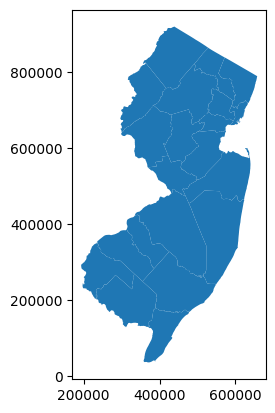

In [34]:
#make the map
njC0.plot()

In [7]:
njC0.head()

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705..."


In [47]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [48]:
NJ_pov.dtypes

,0
GEOID_DESCRIPTION,object
COUNTY,object
GEOID_NAME,object
SITSINSTATE,object
GEOID,int32
GEOID_FORMATTED,int32
PPOV,float32
TIMEFRAME,object
GEOVINTAGE,int16
SOURCE,object


In [46]:
qua_lf.dtypes


,0
COUNTY,object
PhysicallyUnhealthyDaysperMo,float64
MentallyUnhealthyDaysperMont,float64


In [60]:
NJ_pov.head(2)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,GEOID_NAME,SITSINSTATE,GEOID,GEOID_FORMATTED,PPOV,TIMEFRAME,GEOVINTAGE,SOURCE,LOCATION,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,Atlantic,NJ,34001,34001,13.03,2018-2022,2022,Census,New Jersey (State),both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,Bergen,NJ,34003,34003,6.77,2018-2022,2022,Census,New Jersey (State),both


In [61]:
qua_lf.head(2)

,COUNTY,PhysicallyUnhealthyDaysperMo,MentallyUnhealthyDaysperMont
0,ATLANTIC,4.41,4.42
1,BERGEN,3.14,3.42


In [62]:
nj_qualf = pd.merge(njC0, qua_lf, on='COUNTY',how='outer',indicator=True)

In [67]:
nj_pov = pd.merge(njC0, NJ_pov, on='COUNTY', how='outer', indicator='merge_status')


In [63]:
nj_qualf.head(24)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,PhysicallyUnhealthyDaysperMo,MentallyUnhealthyDaysperMont,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152...",4.41,4.42,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",3.14,3.42,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135...",3.39,4.15,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429...",3.94,4.18,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705...",3.89,4.20,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,292,275,265,SOUTHERN,704221.618565,1.398925e+10,"POLYGON ((333743.882 268331.623, 341456.371 26...",4.27,4.62,both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,6118,5768,6556,NORTHEASTERN,344556.557700,3.616984e+09,"POLYGON ((541167.94 755990.81, 541175.5 755969...",3.89,3.78,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,758,684,595,SOUTHERN,560703.567470,9.372632e+09,"POLYGON ((315566.25 382993.34, 315650.44 38290...",3.50,3.99,both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,11817,10733,10808,NORTHEASTERN,381357.990132,1.436708e+09,"MULTIPOLYGON (((586210.281 660143.72, 586222.3...",4.00,3.92,both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,279,246,200,CENTRAL,561760.929390,1.219175e+10,"POLYGON ((391770.815 705704.676, 392388.938 70...",2.79,3.54,both


In [68]:
nj_pov.head(24)

,COUNTY,COUNTY_LAB_x,CO_x,GNIS_NAME_x,GNIS_x,FIPSSTCO_x,FIPSCO_x,ACRES_x,SQ_MILES_x,POP2010_x,...,SITSINSTATE,GEOID,GEOID_FORMATTED,PPOV,TIMEFRAME,GEOVINTAGE,SOURCE,LOCATION,_merge,merge_status
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,NJ,34001,34001,13.03,2018-2022,2022,Census,New Jersey (State),both,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,NJ,34003,34003,6.77,2018-2022,2022,Census,New Jersey (State),both,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,NJ,34005,34005,6.58,2018-2022,2022,Census,New Jersey (State),both,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,NJ,34007,34007,12.41,2018-2022,2022,Census,New Jersey (State),both,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,NJ,34009,34009,8.96,2018-2022,2022,Census,New Jersey (State),both,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,NJ,34011,34011,15.52,2018-2022,2022,Census,New Jersey (State),both,both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,NJ,34013,34013,15.03,2018-2022,2022,Census,New Jersey (State),both,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,NJ,34015,34015,7.47,2018-2022,2022,Census,New Jersey (State),both,both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,NJ,34017,34017,14.16,2018-2022,2022,Census,New Jersey (State),both,both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,NJ,34019,34019,3.69,2018-2022,2022,Census,New Jersey (State),both,both


In [69]:
nj_qualf1 = pd.merge(njC0, qua_lf, on='COUNTY',how='inner',indicator=False)

In [72]:
nj_pov1 = pd.merge(njC0, NJ_pov, on='COUNTY',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Social Explorer - Health Data 2020 Release')

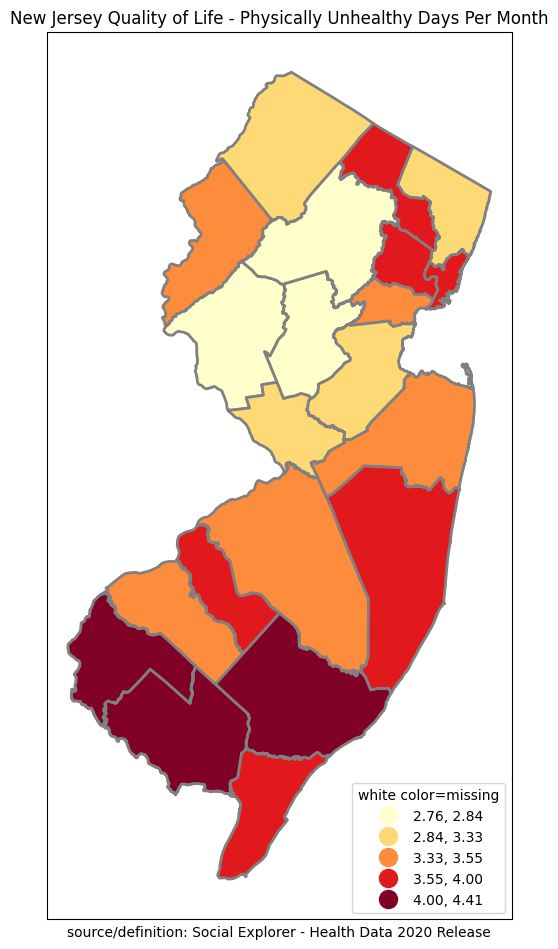

In [28]:
fig, ax = plt.subplots(1, figsize=(6,12))
nj_qualf1.plot(ax=ax,column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

New Jersey Counties showing Physically unhealthy days per month.

<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Social Explorer - Health Data 2020 Release')

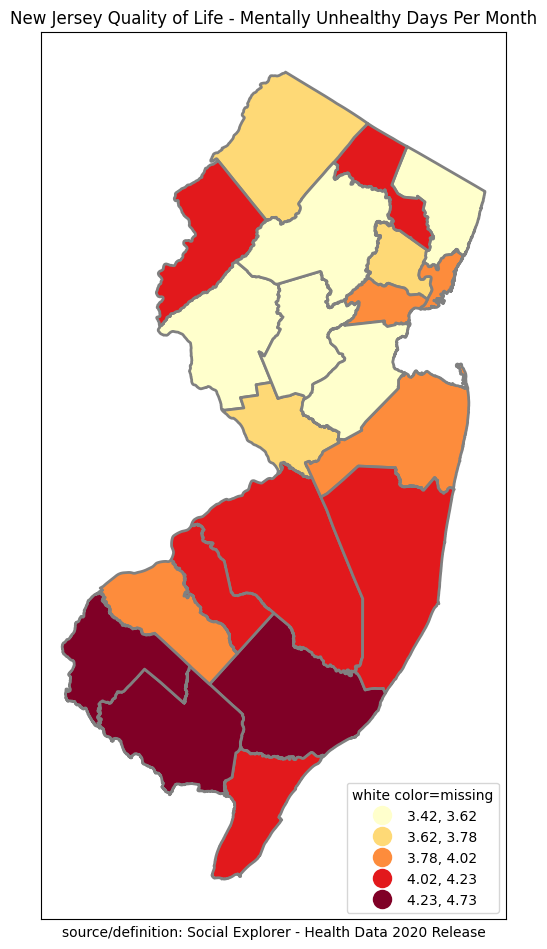

In [27]:
fig, ax = plt.subplots(1, figsize=(6,12))
nj_qualf1.plot(ax=ax,column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Output: New Jersey counties showing mentally unstable days per month.

Findings:

The mapped data revealed a notably higher concentration of both physically and mentally unhealthy days in South Jersey compared to other regions of the state. This phenomenon prompts a closer examination of the underlying factors that might contribute to these health disparities.

To ascertain more trends : E.g Poverty (New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022)

To get a more defined map, county names were included.

In [85]:
print(nj_pov.columns)


Index(['COUNTY', 'COUNTY_LAB_x', 'CO_x', 'GNIS_NAME_x', 'GNIS_x', 'FIPSSTCO_x',
       'FIPSCO_x', 'ACRES_x', 'SQ_MILES_x', 'POP2010_x', 'POP2000_x',
       'POP1990_x', 'POP1980_x', 'POPDEN2010_x', 'POPDEN2000_x',
       'POPDEN1990_x', 'POPDEN1980_x', 'REGION_x', 'Shape_Leng_x',
       'Shape_Area_x', 'geometry_x', 'COUNTY_LAB_y', 'CO_y', 'GNIS_NAME_y',
       'GNIS_y', 'FIPSSTCO_y', 'FIPSCO_y', 'ACRES_y', 'SQ_MILES_y',
       'POP2010_y', 'POP2000_y', 'POP1990_y', 'POP1980_y', 'POPDEN2010_y',
       'POPDEN2000_y', 'POPDEN1990_y', 'POPDEN1980_y', 'REGION_y',
       'Shape_Leng_y', 'Shape_Area_y', 'geometry_y', 'GEOID_DESCRIPTION',
       'GEOID_NAME', 'SITSINSTATE', 'GEOID', 'GEOID_FORMATTED', 'PPOV',
       'TIMEFRAME', 'GEOVINTAGE', 'SOURCE', 'LOCATION', '_merge',
       'merge_status'],
      dtype='object')


In [86]:
nj_pov = nj_pov.set_geometry('geometry_x')



<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Census')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

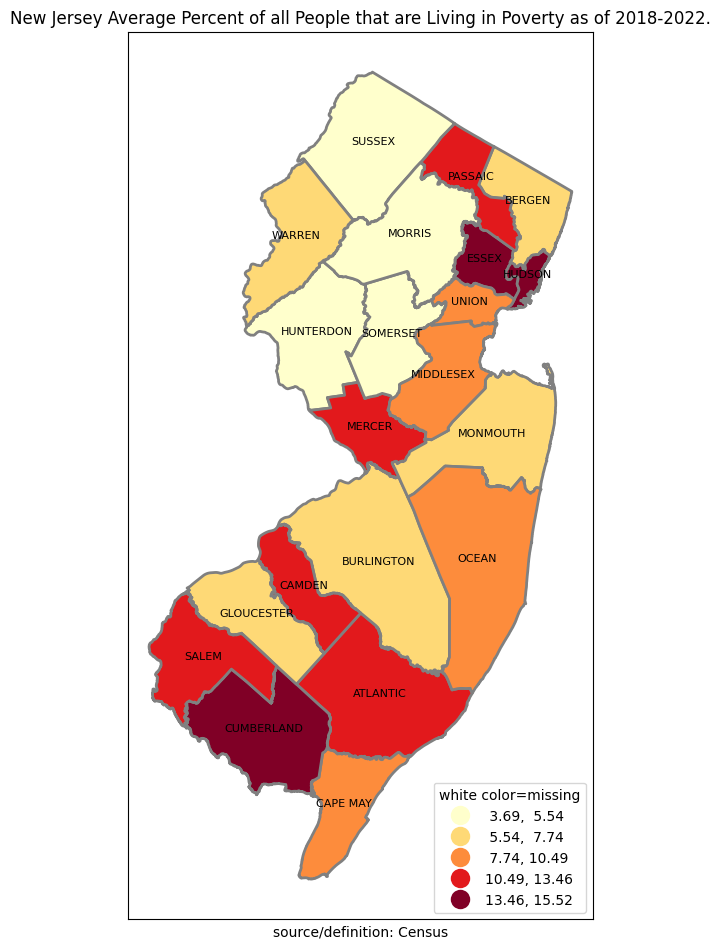

In [91]:
fig, ax = plt.subplots(1, figsize=(6, 12))
nj_pov.plot(ax=ax, column='PPOV', legend=True, cmap='YlOrRd',
            scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
            legend_kwds={"fmt": "{:,.2f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('white color=missing')
ax.title.set_text("New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022.")
ax.set_xticks([])  # removes x ticks
ax.set_yticks([])  # removes y ticks
ax.set_xlabel('source/definition: Census')

for _, row in nj_pov.iterrows():
    # Calculate the centroid of the geometry for placing labels
    centroid = row['geometry_x'].centroid
    # Annotate the county name at the centroid
    ax.annotate(row['COUNTY'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8)


Output: Counties names to better understand trends.

Findings

Socioeconomic Factors:

South Jersey has historically faced various economic challenges compared to its northern counterpart. Factors such as higher rates of unemployment, lower income levels, and limited access to healthcare services can contribute to worse health outcomes. These socioeconomic disparities could explain the higher number of unhealthy


Demographic Considerations:

Differences in population density, age distribution, and racial and ethnic makeup can also influence health metrics. For instance, areas with older populations or higher proportions of minority groups who have faced systemic healthcare barriers might report more unhealthy days.

To corroborate with this findings, Thompson et al. (2021) in their research in the Journal of Public Health observed similar patterns where regions with lower socioeconomic indices suffered disproportionately during health crises, validating the socioeconomic interpretations made here.